In [81]:
df = pd.read_csv("cleaned_salesdata.csv", index_col=0)

In [82]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day'],
      dtype='object')

In [83]:
new_column_names = [
    "row_id",
    "order_id",
    "ship_mode",
    "customer_id",
    "customer_name",
    "segment",
    "country",
    "city",
    "state",
    "postal_code",
    "region",
    "product_id",
    "category",
    "sub_category",
    "product_name",
    "sales",
    "quantity",
    "discount",
    "profit",
    "order_year",
    "order_month",
    "order_day",
    "ship_year",
    "ship_month",
    "ship_day"
]

In [84]:
df.columns = new_column_names
df.columns

Index(['row_id', 'order_id', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'ship_year', 'ship_month', 'ship_day'],
      dtype='object')

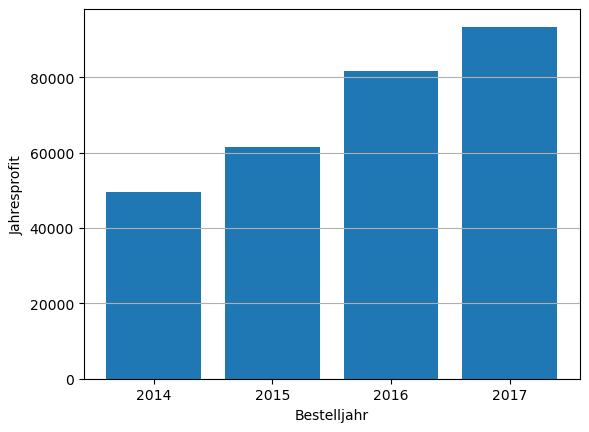

In [85]:
profit_per_year = (df.groupby("order_year")["profit"].sum()
)
plt.figure()
plt.bar(profit_per_year.index, profit_per_year.values)
plt.xlabel("Bestelljahr")
plt.ylabel("Jahresprofit")
plt.grid(axis="y")
plt.xticks(profit_per_year.index)
plt.show()

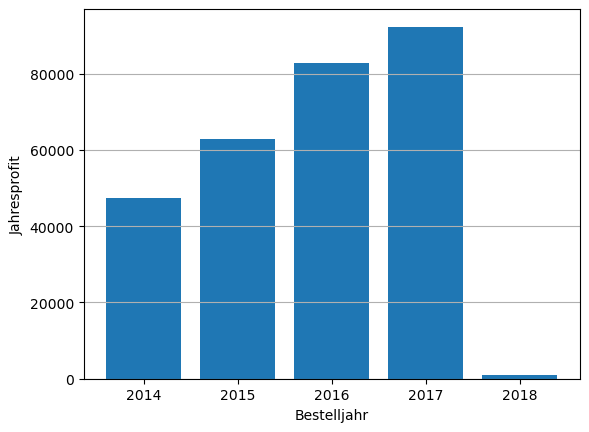

In [86]:
profit_per_year = (df.groupby("ship_year")["profit"].sum()
)
plt.figure()
plt.bar(profit_per_year.index, profit_per_year.values)
plt.xlabel("Bestelljahr")
plt.ylabel("Jahresprofit")
plt.grid(axis="y")
plt.xticks(profit_per_year.index)
plt.show()

In [96]:
df = df.drop(columns=["ship_year","ship_month","ship_day"])
df.columns

KeyError: "['ship_year', 'ship_month', 'ship_day'] not found in axis"

In [101]:
# Gruppieren nach customer_id
id_name_counts = df.groupby('customer_id')['customer_name'].nunique()

# Prüfen, ob alle 1 sind
if (id_name_counts == 1).all():
    print("Jede customer_id hat genau einen customer_name → 1:1 Beziehung")
else:
    problem_ids = id_name_counts[id_name_counts > 1]
    print("Folgende customer_id haben mehrere Namen:")
    print(problem_ids)


Jede customer_id hat genau einen customer_name → 1:1 Beziehung


In [102]:
df = df.drop(columns=["customer_id","customer_name"])
df.columns

Index(['row_id', 'order_id', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'order_year', 'order_month', 'order_day'],
      dtype='object')

In [107]:
df['order_date'] = pd.to_datetime(
    df['order_year'].astype(str) + '-' +
    df['order_month'].astype(str) + '-' +
    df['order_day'].astype(str)
)

# Optional: Wochentag als Name
df['weekday_name'] = df['order_date'].dt.day_name()
df['weekday'] = df['order_date'].dt.weekday
# 3️⃣ Woche im Jahr
df['week_of_year'] = df['order_date'].dt.isocalendar().week

# 4️⃣ Wochenende (True = Samstag/Sonntag)
df['is_weekend'] = df['weekday'] >= 5


df.head()

,row_id,order_id,ship_mode,segment,country,city,state,postal_code,region,product_id,...,discount,profit,order_year,order_month,order_day,order_date,weekday_name,week_of_year,weekday,is_weekend
0,1,CA-2016-152156,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,...,0.00,41.9136,2016,11,8,2016-11-08,Tuesday,45,1,False
1,2,CA-2016-152156,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,...,0.00,219.5820,2016,11,8,2016-11-08,Tuesday,45,1,False
2,3,CA-2016-138688,Second Class,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,...,0.00,6.8714,2016,6,12,2016-06-12,Sunday,23,6,True
3,4,US-2015-108966,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,...,0.45,-383.0310,2015,10,11,2015-10-11,Sunday,41,6,True
4,5,US-2015-108966,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,...,0.20,2.5164,2015,10,11,2015-10-11,Sunday,41,6,True


In [88]:
for col in df.columns:
    print(f"\n Verteilung für Sopalte: {col}")
    display(
        df[col].value_counts(normalize=True, dropna=False).mul(100).round(2).rename("Prozent")
    )


 Verteilung für Sopalte: row_id


row_id
1       0.01
6666    0.01
6659    0.01
6660    0.01
6661    0.01
        ... 
3333    0.01
3334    0.01
3335    0.01
3336    0.01
9994    0.01
Name: Prozent, Length: 9994, dtype: float64


 Verteilung für Sopalte: order_id


order_id
CA-2017-100111    0.14
CA-2017-157987    0.12
CA-2016-165330    0.11
US-2016-108504    0.11
CA-2015-131338    0.10
                  ... 
CA-2016-157259    0.01
CA-2017-107986    0.01
US-2015-112508    0.01
US-2016-126844    0.01
CA-2017-119914    0.01
Name: Prozent, Length: 5009, dtype: float64


 Verteilung für Sopalte: ship_mode


ship_mode
Standard Class    59.72
Second Class      19.46
First Class       15.39
Same Day           5.43
Name: Prozent, dtype: float64


 Verteilung für Sopalte: customer_id


customer_id
WB-21850    0.37
JL-15835    0.34
MA-17560    0.34
PP-18955    0.34
CK-12205    0.32
            ... 
LD-16855    0.01
AO-10810    0.01
CJ-11875    0.01
RE-19405    0.01
JR-15700    0.01
Name: Prozent, Length: 793, dtype: float64


 Verteilung für Sopalte: customer_name


customer_name
William Brown          0.37
John Lee               0.34
Matt Abelman           0.34
Paul Prost             0.34
Chloris Kastensmidt    0.32
                       ... 
Lela Donovan           0.01
Anthony O'Donnell      0.01
Carl Jackson           0.01
Ricardo Emerson        0.01
Jocasta Rupert         0.01
Name: Prozent, Length: 793, dtype: float64


 Verteilung für Sopalte: segment


segment
Consumer       51.94
Corporate      30.22
Home Office    17.84
Name: Prozent, dtype: float64


 Verteilung für Sopalte: country


country
United States    100.0
Name: Prozent, dtype: float64


 Verteilung für Sopalte: city


city
New York City      9.16
Los Angeles        7.47
Philadelphia       5.37
San Francisco      5.10
Seattle            4.28
                   ... 
Glenview           0.01
Missouri City      0.01
Rochester Hills    0.01
Palatine           0.01
Manhattan          0.01
Name: Prozent, Length: 531, dtype: float64


 Verteilung für Sopalte: state


state
California              20.02
New York                11.29
Texas                    9.86
Pennsylvania             5.87
Washington               5.06
Illinois                 4.92
Ohio                     4.69
Florida                  3.83
Michigan                 2.55
North Carolina           2.49
Arizona                  2.24
Virginia                 2.24
Georgia                  1.84
Tennessee                1.83
Colorado                 1.82
Indiana                  1.49
Kentucky                 1.39
Massachusetts            1.35
New Jersey               1.30
Oregon                   1.24
Wisconsin                1.10
Maryland                 1.05
Delaware                 0.96
Minnesota                0.89
Connecticut              0.82
Oklahoma                 0.66
Missouri                 0.66
Alabama                  0.61
Arkansas                 0.60
Rhode Island             0.56
Utah                     0.53
Mississippi              0.53
Louisiana                0.42
Sout


 Verteilung für Sopalte: postal_code


postal_code
10035    2.63
10024    2.30
10009    2.29
94122    2.03
10011    1.93
         ... 
27534    0.01
53186    0.01
32503    0.01
94509    0.01
63376    0.01
Name: Prozent, Length: 631, dtype: float64


 Verteilung für Sopalte: region


region
West       32.05
East       28.50
Central    23.24
South      16.21
Name: Prozent, dtype: float64


 Verteilung für Sopalte: product_id


product_id
OFF-PA-10001970    0.19
TEC-AC-10003832    0.18
FUR-FU-10004270    0.16
FUR-CH-10001146    0.15
TEC-AC-10003628    0.15
                   ... 
TEC-PH-10003535    0.01
TEC-MA-10002937    0.01
OFF-AR-10004974    0.01
TEC-AC-10004814    0.01
OFF-ST-10001627    0.01
Name: Prozent, Length: 1862, dtype: float64


 Verteilung für Sopalte: category


category
Office Supplies    60.30
Furniture          21.22
Technology         18.48
Name: Prozent, dtype: float64


 Verteilung für Sopalte: sub_category


sub_category
Binders        15.24
Paper          13.71
Furnishings     9.58
Phones          8.90
Storage         8.47
Art             7.96
Accessories     7.75
Chairs          6.17
Appliances      4.66
Labels          3.64
Tables          3.19
Envelopes       2.54
Bookcases       2.28
Fasteners       2.17
Supplies        1.90
Machines        1.15
Copiers         0.68
Name: Prozent, dtype: float64


 Verteilung für Sopalte: product_name


product_name
Staple envelope                                                                        0.48
Staples                                                                                0.46
Easy-staple paper                                                                      0.46
Avery Non-Stick Binders                                                                0.20
Staples in misc. colors                                                                0.19
                                                                                       ... 
Boston 1900 Electric Pencil Sharpener                                                  0.01
RCA ViSYS 25423RE1 Corded phone                                                        0.01
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner    0.01
Newell 342                                                                             0.01
Eldon Jumbo ProFile Portable File Boxes Graphite/Black             


 Verteilung für Sopalte: sales


sales
12.960     0.56
19.440     0.39
15.552     0.39
25.920     0.36
10.368     0.36
           ... 
4.240      0.01
319.960    0.01
646.740    0.01
81.940     0.01
243.160    0.01
Name: Prozent, Length: 5825, dtype: float64


 Verteilung für Sopalte: quantity


quantity
3     24.10
2     24.03
5     12.31
4     11.92
1      9.00
7      6.06
6      5.72
9      2.58
8      2.57
10     0.57
11     0.34
14     0.29
13     0.27
12     0.23
Name: Prozent, dtype: float64


 Verteilung für Sopalte: discount


discount
0.00    48.01
0.20    36.59
0.70     4.18
0.80     3.00
0.30     2.27
0.40     2.06
0.60     1.38
0.10     0.94
0.50     0.66
0.15     0.52
0.32     0.27
0.45     0.11
Name: Prozent, dtype: float64


 Verteilung für Sopalte: profit


profit
0.0000     0.65
6.2208     0.43
9.3312     0.38
5.4432     0.32
3.6288     0.32
           ... 
83.2508    0.01
16.1096    0.01
7.1988     0.01
1.6510     0.01
72.9480    0.01
Name: Prozent, Length: 7287, dtype: float64


 Verteilung für Sopalte: order_year


order_year
2017    33.14
2016    25.89
2015    21.03
2014    19.94
Name: Prozent, dtype: float64


 Verteilung für Sopalte: order_month


order_month
11    14.72
12    14.09
9     13.84
10     8.19
5      7.35
6      7.17
7      7.10
8      7.06
3      6.96
4      6.68
1      3.81
2      3.00
Name: Prozent, dtype: float64


 Verteilung für Sopalte: order_day


order_day
20    3.98
21    3.96
2     3.79
5     3.66
3     3.65
26    3.65
11    3.59
23    3.58
8     3.56
17    3.52
14    3.48
12    3.45
9     3.44
13    3.38
1     3.37
19    3.35
25    3.34
18    3.28
4     3.08
24    3.02
10    3.00
7     2.98
30    2.95
6     2.85
22    2.84
28    2.84
27    2.73
15    2.71
16    2.69
29    2.39
31    1.83
Name: Prozent, dtype: float64

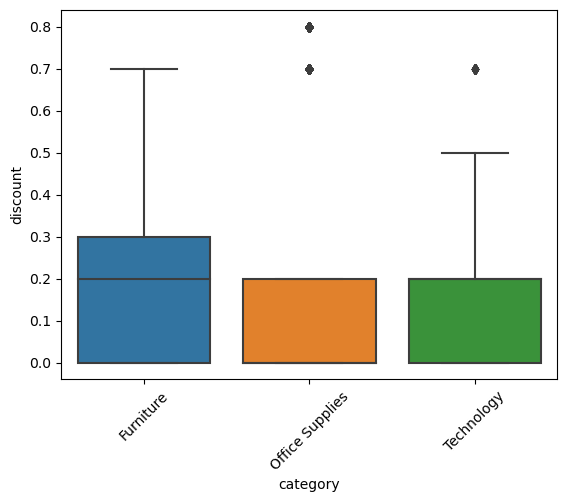

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='category', y='discount', data=df)
plt.xticks(rotation=45)
plt.show()

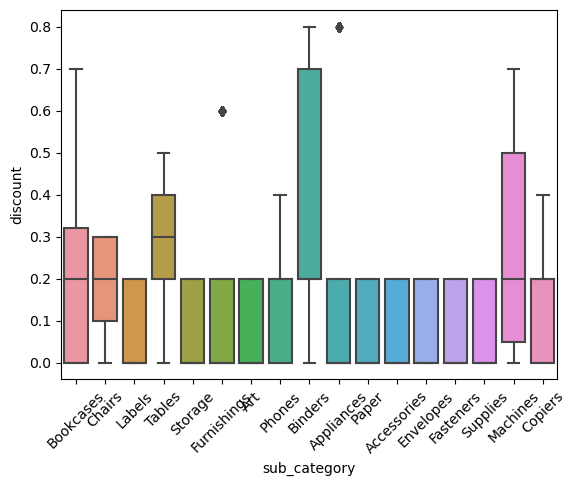

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sub_category', y='discount', data=df)
plt.xticks(rotation=45)
plt.show()

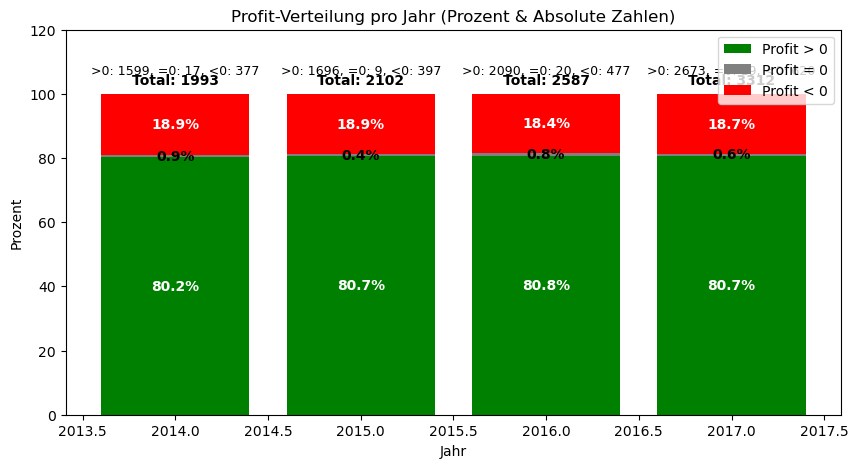

In [109]:
# Jahre sortieren
years = sorted(df['order_year'].unique())

# Listen für Prozentwerte und absolute Werte
pct_zero = []
pct_negative = []
pct_positive = []

abs_zero = []
abs_negative = []
abs_positive = []

for y in years:
    group = df[df['order_year'] == y]
    total = len(group)
    
    count_zero = (group['profit'] == 0).sum()
    count_negative = (group['profit'] < 0).sum()
    count_positive = (group['profit'] > 0).sum()
    
    # Absolute Zahlen
    abs_zero.append(count_zero)
    abs_negative.append(count_negative)
    abs_positive.append(count_positive)
    
    # Prozentwerte
    pct_zero.append(count_zero / total * 100)
    pct_negative.append(count_negative / total * 100)
    pct_positive.append(count_positive / total * 100)

# 1️⃣ Gestapeltes Balkendiagramm in Prozent
plt.figure(figsize=(10,5))
bars_positive = plt.bar(years, pct_positive, label='Profit > 0', color='green')
bars_zero = plt.bar(years, pct_zero, bottom=pct_positive, label='Profit = 0', color='gray')
bars_negative = plt.bar(years, pct_negative, bottom=[i+j for i,j in zip(pct_positive, pct_zero)],
                        label='Profit < 0', color='red')

# Prozentzahlen auf den Balken
for i, year in enumerate(years):
    plt.text(year, pct_positive[i]/2, f"{pct_positive[i]:.1f}%", ha='center', va='center', color='white', fontweight='bold')
    plt.text(year, pct_positive[i] + pct_zero[i]/2, f"{pct_zero[i]:.1f}%", ha='center', va='center', color='black', fontweight='bold')
    plt.text(year, pct_positive[i] + pct_zero[i] + pct_negative[i]/2, f"{pct_negative[i]:.1f}%", ha='center', va='center', color='white', fontweight='bold')

plt.ylabel('Prozent')
plt.xlabel('Jahr')
plt.title('Profit-Verteilung pro Jahr (Prozent & Absolute Zahlen)')
plt.legend()
plt.ylim(0, 100)

# 2️⃣ Absolute Zahlen direkt über den Balken
for i, year in enumerate(years):
    total = abs_positive[i] + abs_zero[i] + abs_negative[i]
    plt.text(year, 102, f"Total: {total}", ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.text(year, 105, f">0: {abs_positive[i]}, =0: {abs_zero[i]}, <0: {abs_negative[i]}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, 120)  # Platz für absolute Zahlen
plt.show()

c:\Users\U773897\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\U773897\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


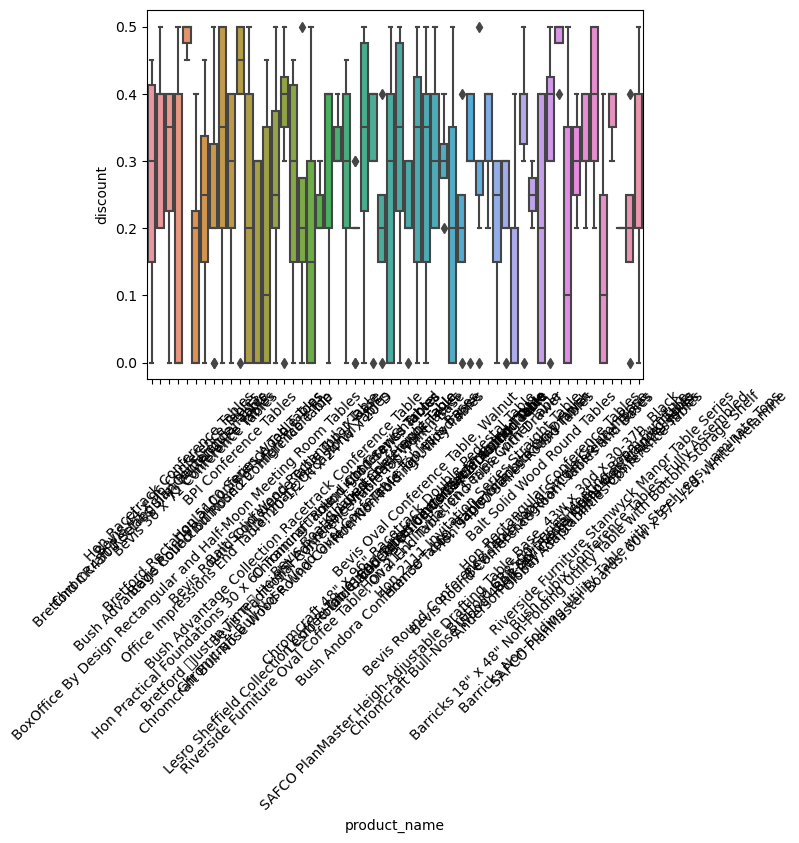

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='product_name', y='discount', data=df[df["sub_category"] == "Tables"])
plt.xticks(rotation=45)
plt.show()

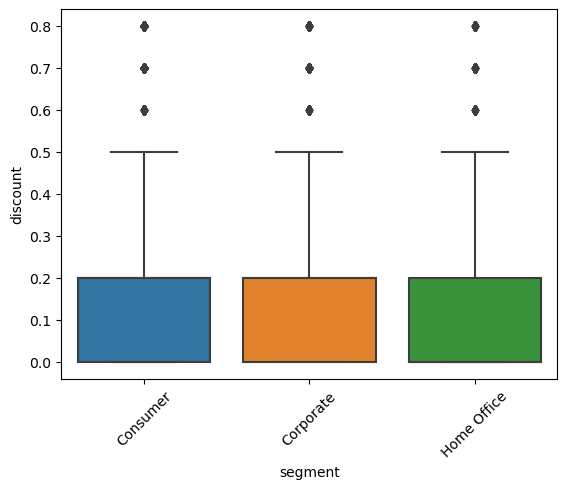

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='segment', y='discount', data=df)
plt.xticks(rotation=45)
plt.show()

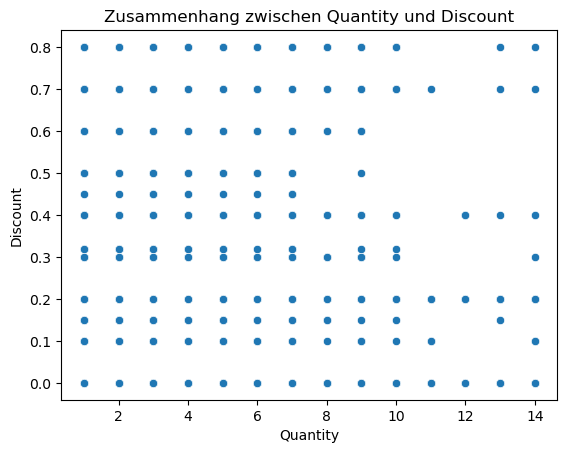

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='quantity', y='discount', data=df)
plt.xlabel("Quantity")
plt.ylabel("Discount")
plt.title("Zusammenhang zwischen Quantity und Discount")
plt.show()

In [94]:
df[df["customer_id"] == "WB-21850"]

,row_id,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,...,category,sub_category,product_name,sales,quantity,discount,profit,order_year,order_month,order_day
2133,2134,CA-2015-122210,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,Pennsylvania,19134,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,152.991,3,0.7,-122.3928,2015,11,30
2134,2135,CA-2015-122210,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,Pennsylvania,19134,...,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7,0.2,-2.3814,2015,11,30
2135,2136,CA-2015-122210,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,Pennsylvania,19134,...,Technology,Phones,Motorla HX550 Universal Bluetooth Headset,94.920,4,0.4,15.8200,2015,11,30
2148,2149,CA-2014-141607,Standard Class,WB-21850,William Brown,Consumer,United States,Concord,California,94521,...,Furniture,Furnishings,Eldon Advantage Chair Mats for Low to Medium P...,43.310,1,0.0,4.3310,2014,12,12
3741,3742,CA-2016-137848,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,New York,10011,...,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4,0.0,7.5992,2016,1,15
3742,3743,CA-2016-137848,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,New York,10011,...,Office Supplies,Paper,Xerox 1959,60.120,9,0.0,28.8576,2016,1,15
3743,3744,CA-2016-137848,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,New York,10011,...,Office Supplies,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.536,3,0.2,17.3376,2016,1,15
4226,4227,CA-2017-120327,Standard Class,WB-21850,William Brown,Consumer,United States,Urbandale,Iowa,50322,...,Office Supplies,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,45.920,4,0.0,21.5824,2017,11,11
4308,4309,CA-2014-125829,Standard Class,WB-21850,William Brown,Consumer,United States,Los Angeles,California,90045,...,Technology,Phones,Polycom SoundPoint Pro SE-225 Corded phone,666.344,7,0.2,66.6344,2014,11,4
4309,4310,CA-2014-125829,Standard Class,WB-21850,William Brown,Consumer,United States,Los Angeles,California,90045,...,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",573.728,4,0.2,-64.5444,2014,11,4


In [95]:
profit_percent = df["Profit"].value_counts(normalize=True) * 100
profit_percent = profit_percent.sort_index()

KeyError: 'Profit'

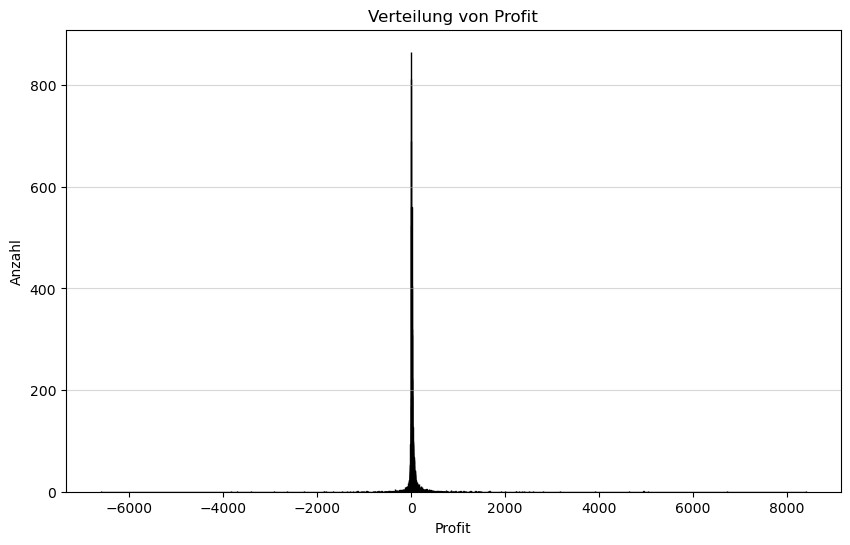

In [ ]:
import matplotlib.pyplot as plt

# Wir gehen davon aus, dass 'df' Ihr DataFrame ist
col = 'Profit'

plt.figure(figsize=(10, 6))

# plt.hist erstellt das Histogramm
# bins=50 bedeutet, dass der gesamte Bereich in 50 Balken unterteilt wird.
# Je höher die Zahl bei 'bins', desto feiner (genauer) wird die Unterteilung.
plt.hist(df[col], bins=7287, color='skyblue', edgecolor='black')

plt.title(f'Verteilung von {col}')
plt.xlabel(col)
plt.ylabel('Anzahl')
plt.grid(axis='y', alpha=0.5)

# Anzeigen (in Jupyter/Colab nicht zwingend nötig, aber sauber)
plt.show() # oder plt.savefig('profit_plot.png')

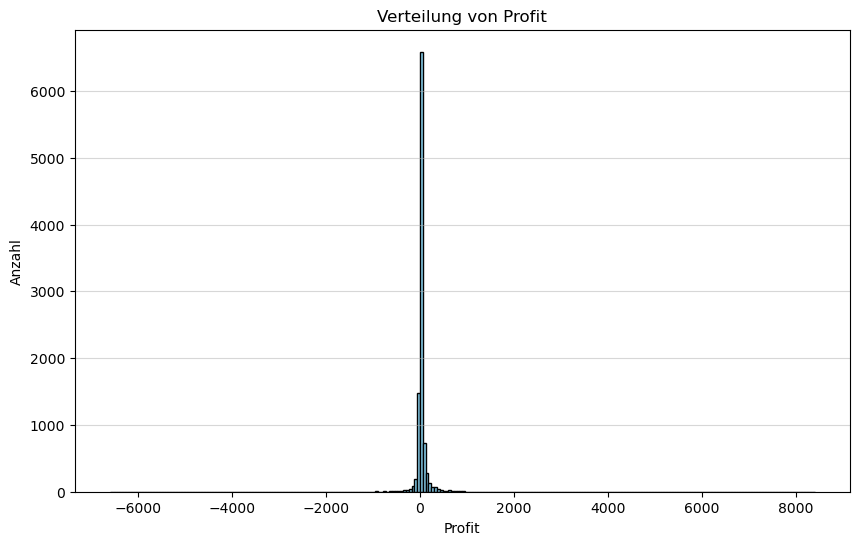

In [ ]:
import matplotlib.pyplot as plt

# Wir gehen davon aus, dass 'df' Ihr DataFrame ist
col = 'Profit'

plt.figure(figsize=(10, 6))

# plt.hist erstellt das Histogramm
# bins=50 bedeutet, dass der gesamte Bereich in 50 Balken unterteilt wird.
# Je höher die Zahl bei 'bins', desto feiner (genauer) wird die Unterteilung.
plt.hist(df[col], bins=250, color='skyblue', edgecolor='black')

plt.title(f'Verteilung von {col}')
plt.xlabel(col)
plt.ylabel('Anzahl')
plt.grid(axis='y', alpha=0.5)

# Anzeigen (in Jupyter/Colab nicht zwingend nötig, aber sauber)
plt.show() # oder plt.savefig('profit_plot.png')